In [ ]:
from RAT_env import *
from DQN_Agent_lib import *
from RL import *
import numpy as np
import matplotlib.pyplot as plt

Initialize enviroment for the training

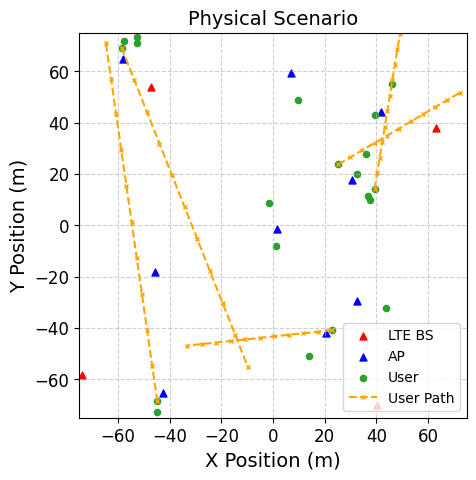

In [2]:
# Parameters for the Multi-RAT Network
area_width = 150
n_aps = 9
n_users = 20
n_steps = 10


rat_env = Multi_RAT_Network(area_width, n_users, n_aps, n_steps, plot=True,train=True)

Train the DQN Agent

In [3]:
import time
from datetime import date

start = time.time()

str_dt = date.today().strftime("%d%m%Y")
dqn_agent, loss_data, last_rats, episode_rewards, best_actions,eps_list,episode_length= \
    run_DQN_Agent(rat_env, max_steps=n_steps, sim_steps=100000,
                    exploration_fraction = 0.5, buffer_size=10000,AN_file_name="Action_Net")

print("Total time taken: ")
print(time.time() - start)

Simulation Progress:  20%|██        | 20004/100000 [16:53<1:23:05, 16.05it/s]

Iteration 20000 A_Loss: 0.028683921322226524


Simulation Progress:  30%|███       | 30002/100000 [28:57<1:19:21, 14.70it/s]

Iteration 30000 A_Loss: 0.05059744790196419


Simulation Progress:  40%|████      | 40003/100000 [41:35<1:03:47, 15.68it/s]

Iteration 40000 A_Loss: 0.06069063022732735


Simulation Progress:  50%|█████     | 50002/100000 [53:27<1:00:56, 13.67it/s]

Iteration 50000 A_Loss: 0.059437137097120285


Simulation Progress:  60%|██████    | 60003/100000 [1:05:07<41:46, 15.96it/s]

Iteration 60000 A_Loss: 0.0940127894282341


Simulation Progress:  70%|███████   | 70003/100000 [1:16:20<32:00, 15.62it/s]  

Iteration 70000 A_Loss: 0.09645916521549225


Simulation Progress:  80%|████████  | 80004/100000 [1:26:45<19:55, 16.73it/s]

Iteration 80000 A_Loss: 0.07763819396495819


Simulation Progress:  90%|█████████ | 90002/100000 [1:37:09<10:22, 16.06it/s]

Iteration 90000 A_Loss: 0.09999687969684601


Simulation Progress: 100%|██████████| 100000/100000 [1:47:50<00:00, 15.46it/s]

Saving final weights to disk
Weights saved to disk
csv imported
Total time taken: 
6474.013104438782


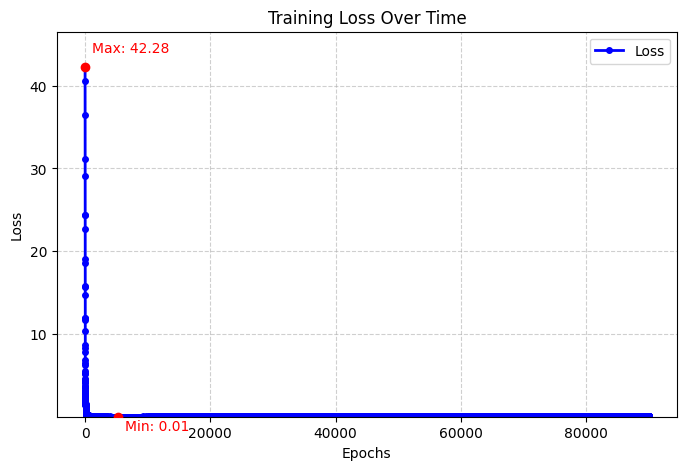

In [4]:
plt.figure(figsize=(8, 5)) 

plt.plot(loss_data, label="Loss", color="blue", linewidth=2, marker="o", markersize=4)

plt.ylim(np.min(loss_data) * 0.9, np.max(loss_data) * 1.1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

min_idx = np.argmin(loss_data)
max_idx = np.argmax(loss_data)

plt.scatter([min_idx, max_idx], [loss_data[min_idx], loss_data[max_idx]], color="red", zorder=3)
plt.annotate(f"Min: {loss_data[min_idx]:.2f}", (min_idx, loss_data[min_idx]), 
             textcoords="offset points", xytext=(5, -10), ha="left", color="red")
plt.annotate(f"Max: {loss_data[max_idx]:.2f}", (max_idx, loss_data[max_idx]), 
             textcoords="offset points", xytext=(5, 10), ha="left", color="red")

plt.show()


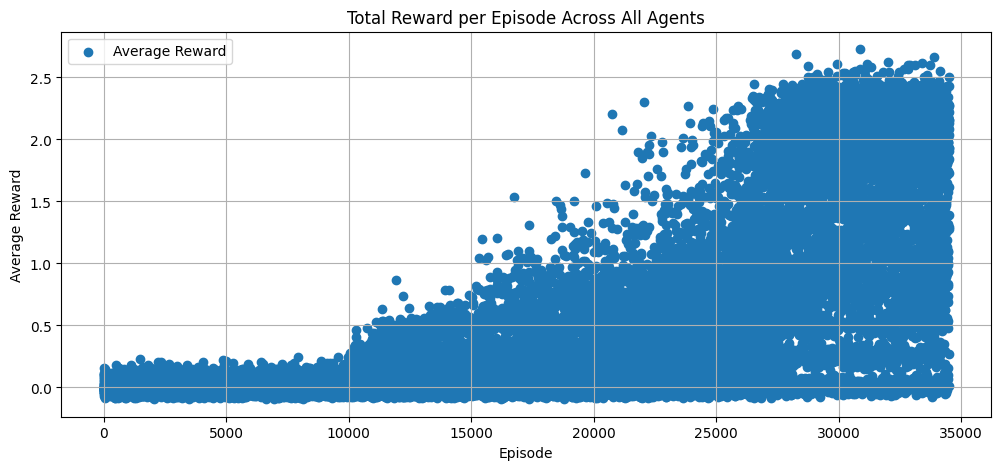

In [6]:
episode_rewards = np.array(episode_rewards)

# Calculate the average reward across all agents for each episode
average_rewards = np.mean(episode_rewards, axis=1)

plt.figure(figsize=(12, 5))

# Plot the average reward per episode across all agents
plt.scatter(range(episode_rewards.shape[0]), average_rewards, label="Average Reward")

plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Total Reward per Episode Across All Agents")
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Episode Length Over Time')

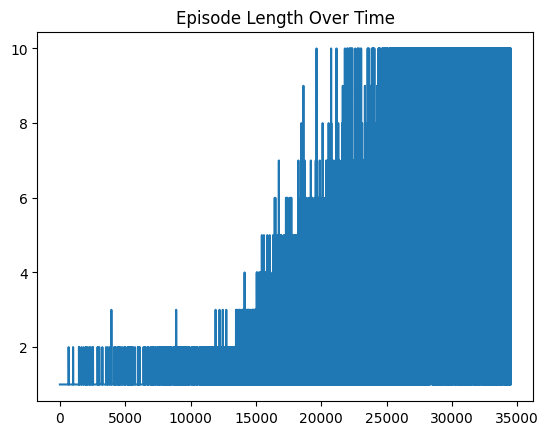

In [11]:
plt.plot(episode_length)
plt.title("Episode Length Over Time")